In [18]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn import preprocessing, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [19]:
house_data = pd.read_csv('./train.csv')

In [20]:
print("Visualizing first 10 rows of the data")
house_data.head(10)

Visualizing first 10 rows of the data


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [21]:
print("Finding the types of the data")
house_data.info()

Finding the types of the data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 no

In [22]:
print("Missing values")
nulls = house_data.isna().sum()
nulls

Missing values


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [23]:
print("Percentage of null values")
nulls = pd.DataFrame(house_data.isna().mean().round(5).sort_values(ascending=False)[:25] * 100)
nulls.columns = ['Null Percentage']
nulls.index.name = 'Feature'
nulls

Percentage of null values


,Null Percentage
Feature,
PoolQC,99.521
MiscFeature,96.301
Alley,93.767
Fence,80.753
FireplaceQu,47.260
LotFrontage,17.740
GarageYrBlt,5.548
GarageCond,5.548
GarageType,5.548


In [24]:
print("Dropping Null values")
data = house_data.select_dtypes(include=[np.number]).interpolate().dropna()
data

Dropping Null values


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [25]:
print("Percentage of null values")
nulls = pd.DataFrame(data.isna().mean().round(5).sort_values(ascending=False)[:25] * 100)
nulls.columns = ['Null Percentage']
nulls.index.name = 'Feature'
nulls

Percentage of null values


,Null Percentage
Feature,
Id,0.0
WoodDeckSF,0.0
BedroomAbvGr,0.0
KitchenAbvGr,0.0
TotRmsAbvGrd,0.0
Fireplaces,0.0
GarageYrBlt,0.0
GarageCars,0.0
GarageArea,0.0


In [26]:
X = data.drop(['Id', 'SalePrice'], axis=1)
y = data['SalePrice']

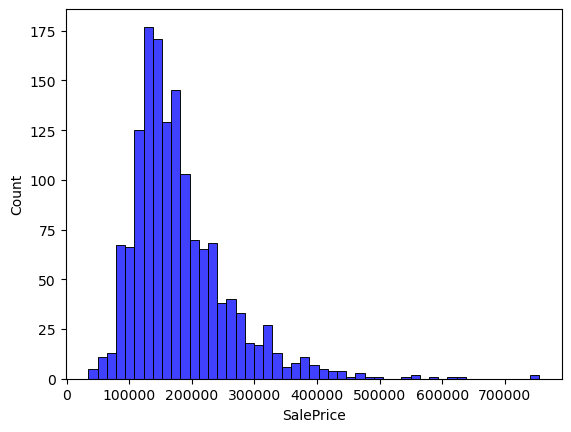

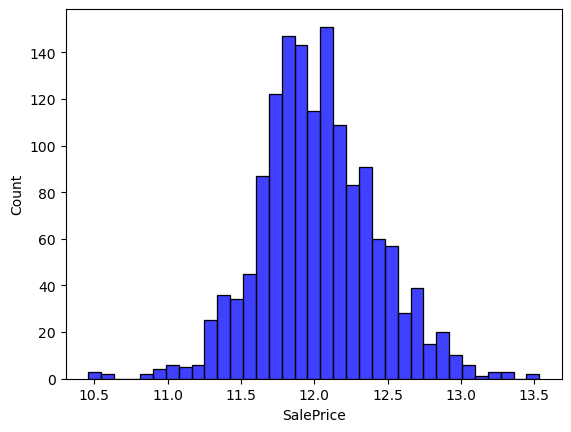

In [27]:
sns.histplot(y, color='blue')
plt.show()

sns.histplot(np.log(y), color='blue')
plt.show()

In [28]:
print("Scalling Features and targets")
scaler = preprocessing.StandardScaler()
scaler.fit(X)


Scalling Features and targets


StandardScaler()

In [29]:
print("Scalling Targets")
y = np.log(data['SalePrice'])

Scalling Targets


In [30]:
print("Splitting data to training and testing sets")
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

Splitting data to training and testing sets


In [31]:
lin_model = linear_model.LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [32]:
predictions = lin_model.predict(X_test)

In [33]:
print("Model Accuracy")
MSE = mean_squared_error(y_test, predictions)
R2_score = r2_score(y_test, predictions)
print(f"Mean Squared Error: {MSE}")
print(f"R2 Score: {R2_score:0.2%}") 

Model Accuracy
Mean Squared Error: 0.023390905304161675
R2 Score: 86.28%


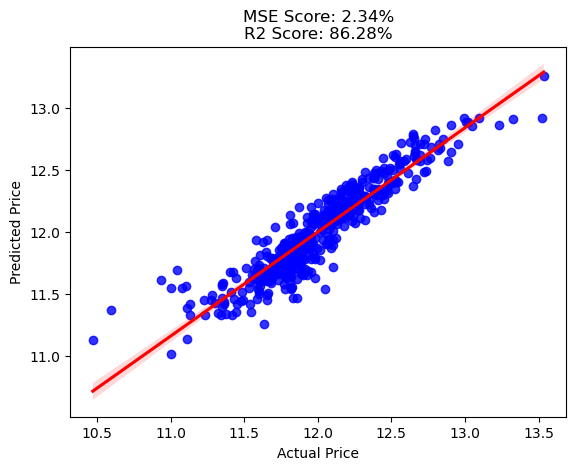

In [17]:
sns.regplot(x= y_test, y = predictions, color="blue", line_kws={"color": "red"})
plt.title(f'MSE Score: {MSE:0.2%}\nR2 Score: {R2_score:0.2%}')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()